In [1]:
%load_ext watermark
%load_ext autoreload

In [2]:
%autoreload 2
%watermark -v -n -m -p numpy

Sat Oct 10 2020 

CPython 3.8.5
IPython 7.16.1

numpy 1.19.2

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-47-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 12
interpreter: 64bit


In [3]:
import sys
sys.path.append('../../')
from pathlib import Path
from src.settings import DATA_DIR, RESULT_DIR

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## __GAT and GNN__

In [20]:
DIR_NAME = 'cross_val'
MODEL_NAME = 'GAT'
DATASET = 'tuheeg_seizure'
TRIAL_NAME = f'{DATASET}.csv'

SAVE_DIR = RESULT_DIR / DIR_NAME / MODEL_NAME

CV_DF = SAVE_DIR / TRIAL_NAME

In [21]:
cv_df = pd.read_csv(CV_DF, dtype={'cv_run':int})

cv_df = cv_df.groupby(['lr', 'hidden_units', 'output_shape', 'dropout'])    
cv_hparams_df = [cv_df.get_group(x) for x in cv_df.groups]


In [22]:
cv_hparams_df[0]

hidden_units  output_shape  dropout      lr  cv_run  accuracy  recall_1  \
0           64.0          64.0      0.2  0.0005       0  0.956376  0.936047   
1           64.0          64.0      0.2  0.0005       0  0.958054  0.912791   
2           64.0          64.0      0.2  0.0005       0  0.973154  0.941860   
3           64.0          64.0      0.2  0.0005       0  0.956376  0.866279   
4           64.0          64.0      0.2  0.0005       0  0.961409  0.912791   
..           ...           ...      ...     ...     ...       ...       ...   
95          64.0          64.0      0.2  0.0005       9  0.959731  0.936047   
96          64.0          64.0      0.2  0.0005       9  0.963087  0.936047   
97          64.0          64.0      0.2  0.0005       9  0.974790  0.941520   
98          64.0          64.0      0.2  0.0005       9  0.963025  0.918129   
99          64.0          64.0      0.2  0.0005       9  0.959664  0.923977   

    precision_1  f1score_1  recall_0  precision_0  f1score_0  
0      0.914773   0.925287  0.964623     0.973810   0.969194  
1      0.940120   0.926254  0.976415     0.965035   0.970692  
2      0.964286   0.952941  0.985849     0.976635   0.981221  
3      0.980263   0.919753  0.992924     0.948198   0.970046  
4      0.951515   0.931751  0.981132     0.965197   0.973099  
..          ...        ...       ...          ...        ...  
95     0.925287   0.930636  0.969340     0.973934   0.971631  
96     0.936047   0.936047  0.974057     0.974057   0.974057  
97     0.969880   0.955490  0.988208     0.976690   0.982415  
98     0.951515   0.934524  0.981132     0.967442   0.974239  
99     0.934911   0.929412  0.974057     0.969484   0.971765  

[100 rows x 12 columns]

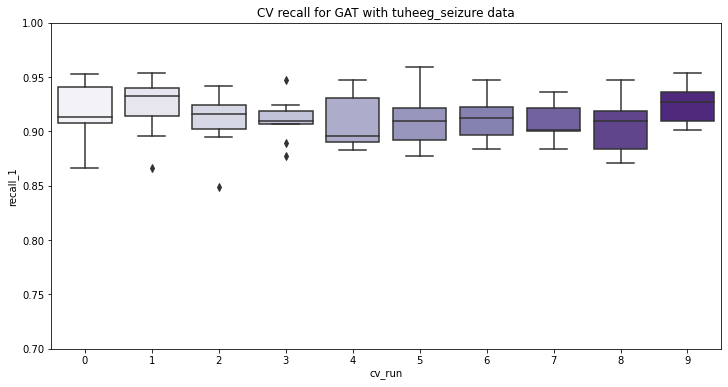

In [23]:
for df in cv_hparams_df:
    plt.figure(figsize=(12,6))
    
    hid_units = df['hidden_units'].values[0]
    out_shape = df['output_shape'].values[0]
    drop = df['dropout'].values[0]
    lr = df['lr'].values[0]
    
    ax = sns.boxplot(x="cv_run", y="recall_1", data=df, palette='Purples')
    ax.set_title(f'CV recall for {MODEL_NAME} with {DATASET} data')
    ax.set(ylim=(0.70, 1.0))
    
    fig = ax.get_figure()
    fig.savefig(SAVE_DIR / f'{DATASET}_recall-hid_unit-{hid_units}-out_shape-{out_shape}-dropout-{drop}-lr-{lr}.png')
    

## __LSTAMAtt and LSTM__

In [34]:
DIR_NAME = 'cross_val'
MODEL_NAME = 'LSTMAtt'
DATASET = 'tuheeg_seizure'
TRIAL_NAME = f'{DATASET}_2layer.csv'

SAVE_DIR = RESULT_DIR / DIR_NAME / MODEL_NAME

CV_DF = SAVE_DIR / TRIAL_NAME

In [35]:
cv_df = pd.read_csv(CV_DF, dtype={'cv_run':int})

cv_df = cv_df.groupby(['hidden_units', 'l2', 'dropout_0', 'dropout_1', 'dropout_2', 'lr'])    
cv_hparams_df = [cv_df.get_group(x) for x in cv_df.groups]

In [36]:
cv_hparams_df[0]

hidden_units     l2  dropout_0  dropout_1  dropout_2      lr  cv_run  \
0          128.0  0.001        0.1        0.2        0.2  0.0001       0   
1          128.0  0.001        0.1        0.2        0.2  0.0001       0   
2          128.0  0.001        0.1        0.2        0.2  0.0001       0   
3          128.0  0.001        0.1        0.2        0.2  0.0001       0   
4          128.0  0.001        0.1        0.2        0.2  0.0001       0   
..           ...    ...        ...        ...        ...     ...     ...   
95         128.0  0.001        0.1        0.2        0.2  0.0001       9   
96         128.0  0.001        0.1        0.2        0.2  0.0001       9   
97         128.0  0.001        0.1        0.2        0.2  0.0001       9   
98         128.0  0.001        0.1        0.2        0.2  0.0001       9   
99         128.0  0.001        0.1        0.2        0.2  0.0001       9   

    accuracy  recall_1  precision_1  f1score_1  recall_0  precision_0  \
0   0.968121  0.941860     0.947368   0.944606  0.978774     0.976471   
1   0.959731  0.872093     0.986842   0.925926  0.995283     0.950450   
2   0.973154  0.959302     0.948276   0.953757  0.978774     0.983412   
3   0.959731  0.970930     0.897849   0.932961  0.955189     0.987805   
4   0.966443  0.947674     0.936782   0.942197  0.974057     0.978673   
..       ...       ...          ...        ...       ...          ...   
95  0.973154  0.941860     0.964286   0.952941  0.985849     0.976635   
96  0.969799  0.953488     0.942529   0.947977  0.976415     0.981043   
97  0.971429  0.941520     0.958333   0.949852  0.983491     0.976581   
98  0.971429  0.941520     0.958333   0.949852  0.983491     0.976581   
99  0.973109  0.947368     0.958580   0.952941  0.983491     0.978873   

    f1score_0  
0    0.977621  
1    0.972350  
2    0.981088  
3    0.971223  
4    0.976359  
..        ...  
95   0.981221  
96   0.978723  
97   0.980024  
98   0.980024  
99   0.981177  

[100 rows x 14 columns]

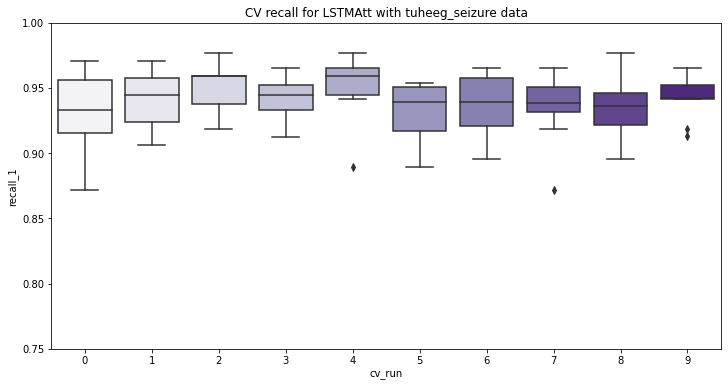

In [37]:
for df in cv_hparams_df:
    plt.figure(figsize=(12,6))
    
    hid_units = df['hidden_units'].values[0]
    drop_0 = df['dropout_0'].values[0]
    drop_1 = df['dropout_1'].values[0]
    drop_2 = df['dropout_2'].values[0]
    lr = df['lr'].values[0]
    l2 = df['l2'].values[0]
    
    ax = sns.boxplot(x="cv_run", y="recall_1", data=df, palette='Purples')
    ax.set_title(f'CV recall for {MODEL_NAME} with {DATASET} data')
    ax.set(ylim=(0.75, 1.00))
    
    fig = ax.get_figure()
    fig.savefig(SAVE_DIR / f'{DATASET}_recall-hid_unit-{hid_units}-d0-{drop_0}-d1-{drop_1}-d2-{drop_2}-l2-{l2}-lr-{lr}.png')
    

## __CBAM__

In [29]:
DIR_NAME = 'cross_val'
MODEL_NAME = 'CBAM'
DATASET = 'tuheeg_seizure'
TRIAL_NAME = f'{DATASET}.csv'

SAVE_DIR = RESULT_DIR / DIR_NAME / MODEL_NAME

CV_DF = SAVE_DIR / TRIAL_NAME

In [30]:
cv_df = pd.read_csv(CV_DF, dtype={'cv_run':int})

cv_df = cv_df.groupby(['lr', 'hidden_units', 'filters', 'kernel', 'dropout', 'reduction_ratio', 
                  'spatial_kernel'])    
cv_hparams_df = [cv_df.get_group(x) for x in cv_df.groups]

In [31]:
cv_hparams_df[0]

hidden_units  filters  kernel  dropout  reduction_ratio  spatial_kernel  \
0          256.0     32.0     3.0     0.15             16.0             7.0   
1          256.0     32.0     3.0     0.15             16.0             7.0   
2          256.0     32.0     3.0     0.15             16.0             7.0   
3          256.0     32.0     3.0     0.15             16.0             7.0   
4          256.0     32.0     3.0     0.15             16.0             7.0   
..           ...      ...     ...      ...              ...             ...   
95         256.0     32.0     3.0     0.15             16.0             7.0   
96         256.0     32.0     3.0     0.15             16.0             7.0   
97         256.0     32.0     3.0     0.15             16.0             7.0   
98         256.0     32.0     3.0     0.15             16.0             7.0   
99         256.0     32.0     3.0     0.15             16.0             7.0   

       lr  cv_run  accuracy  recall_1  precision_1  f1score_1  recall_0  \
0   0.001       0  0.956376  0.941860     0.910112   0.925714  0.962264   
1   0.001       0  0.942953  0.889535     0.910714   0.900000  0.964623   
2   0.001       0  0.978188  0.947674     0.976048   0.961652  0.990566   
3   0.001       0  0.973154  0.947674     0.958824   0.953216  0.983491   
4   0.001       0  0.974832  0.959302     0.953757   0.956522  0.981132   
..    ...     ...       ...       ...          ...        ...       ...   
95  0.001       9  0.951342  0.953488     0.886486   0.918767  0.950472   
96  0.001       9  0.959731  0.901163     0.956790   0.928144  0.983491   
97  0.001       9  0.969748  0.959064     0.937143   0.947977  0.974057   
98  0.001       9  0.939496  0.959064     0.849741   0.901099  0.931604   
99  0.001       9  0.951260  0.906433     0.922619   0.914454  0.969340   

    precision_0  f1score_0  
0      0.976077   0.969121  
1      0.955608   0.960094  
2      0.979021   0.984760  
3      0.978873   0.981177  
4      0.983452   0.982290  
..          ...        ...  
95     0.980535   0.965270  
96     0.960830   0.972028  
97     0.983333   0.978673  
98     0.982587   0.956417  
99     0.962529   0.965923  

[100 rows x 15 columns]

In [33]:
for df in cv_hparams_df:
    plt.figure(figsize=(12,6))
    
    hid_units = df['hidden_units'].values[0]
    drop = df['dropout'].values[0]
    kernel = df['kernel'].values[0]
    filters = df['filters'].values[0]
    lr = df['lr'].values[0]
    red_ratio = df['reduction_ratio'].values[0]
    spatial_kernel = df['spatial_kernel'].values[0]
    
    ax = sns.boxplot(x="cv_run", y="recall_1", data=df, palette='Purples')
    ax.set_title(f'CV recall for {MODEL_NAME} with {DATASET} data')
    ax.set(ylim=(0.70, 1.0))
    
    fig = ax.get_figure()
    fig.savefig(SAVE_DIR / (f'{DATASET}_recall-hid_unit-{hid_units}-drop-{drop}-kernel-{kernel}-filters-{filters}'+
                            f'-red_ratio-{red_ratio}-att_kernel-{spatial_kernel}-lr-{lr}.png'))
    

## __CNN__

In [24]:
DIR_NAME = 'cross_val'
MODEL_NAME = 'CNN'
DATASET = 'tuheeg_seizure'
TRIAL_NAME = f'{DATASET}.csv'

SAVE_DIR = RESULT_DIR / DIR_NAME / MODEL_NAME

CV_DF = SAVE_DIR / TRIAL_NAME

In [25]:
cv_df = pd.read_csv(CV_DF, dtype={'cv_run':int})

cv_df = cv_df.groupby(['lr', 'hidden_units', 'filters', 'kernel', 'dropout'])    
cv_hparams_df = [cv_df.get_group(x) for x in cv_df.groups]

In [26]:
cv_hparams_df[0]

hidden_units  filters  kernel  dropout     lr  cv_run  accuracy  recall_1  \
0            8.0      8.0     3.0     0.15  0.001       0  0.944631  0.860465   
1            8.0      8.0     3.0     0.15  0.001       0  0.969799  0.918605   
2            8.0      8.0     3.0     0.15  0.001       0  0.958054  0.901163   
3            8.0      8.0     3.0     0.15  0.001       0  0.958054  0.906977   
4            8.0      8.0     3.0     0.15  0.001       0  0.969799  0.959302   
..           ...      ...     ...      ...    ...     ...       ...       ...   
95           8.0      8.0     3.0     0.15  0.001       9  0.956376  0.930233   
96           8.0      8.0     3.0     0.15  0.001       9  0.959731  0.918605   
97           8.0      8.0     3.0     0.15  0.001       9  0.939496  0.929825   
98           8.0      8.0     3.0     0.15  0.001       9  0.961345  0.947368   
99           8.0      8.0     3.0     0.15  0.001       9  0.963025  0.953216   

    precision_1  f1score_1  recall_0  precision_0  f1score_0  
0      0.942675   0.899696  0.978774     0.945330   0.961761  
1      0.975309   0.946108  0.990566     0.967742   0.979021  
2      0.950920   0.925373  0.981132     0.960739   0.970828  
3      0.945455   0.925816  0.978774     0.962877   0.970760  
4      0.937500   0.948276  0.974057     0.983333   0.978673  
..          ...        ...       ...          ...        ...  
95     0.919540   0.924856  0.966981     0.971564   0.969267  
96     0.940476   0.929412  0.976415     0.967290   0.971831  
97     0.868852   0.898305  0.943396     0.970874   0.956938  
98     0.920455   0.933718  0.966981     0.978520   0.972716  
99     0.920904   0.936782  0.966981     0.980861   0.973872  

[100 rows x 13 columns]

In [28]:
for df in cv_hparams_df:
    plt.figure(figsize=(12,6))
    
    hid_units = df['hidden_units'].values[0]
    drop = df['dropout'].values[0]
    kernel = df['kernel'].values[0]
    filters = df['filters'].values[0]
    lr = df['lr'].values[0]
    
    ax = sns.boxplot(x="cv_run", y="recall_1", data=df, palette='Purples')
    ax.set_title(f'CV recall for {MODEL_NAME} with {DATASET} data')
    ax.set(ylim=(0.70, 1.0))
    
    fig = ax.get_figure()
    fig.savefig(SAVE_DIR / (f'{DATASET}_recall-hid_unit-{hid_units}-drop-{drop}-kernel-{kernel}-filters-{filters}'+
                            f'-lr-{lr}.png'))
    